In [97]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
dataset = keras.datasets.cifar10
(Xtrain, ytrain), (Xtest, ytest) = dataset.load_data()
print(Xtrain.shape)

(50000, 32, 32, 3)


In [98]:
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

In [133]:
model = keras.Sequential([keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = tf.nn.relu, input_shape = Xtrain.shape[1:]),
                          keras.layers.Dropout(0.2),
                          keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = tf.nn.relu),
                          keras.layers.MaxPooling2D(pool_size = (2, 2)),
                          keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = tf.nn.relu),
                          keras.layers.Dropout(0.2),
                          keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = tf.nn.relu),
                          keras.layers.MaxPooling2D(pool_size = (2, 2)),
                          keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = tf.nn.relu),
                          keras.layers.Dropout(0.2),
                          keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = tf.nn.relu),
                          keras.layers.MaxPooling2D(pool_size = (2, 2)),
                          keras.layers.Flatten(),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(1024, activation = tf.nn.relu),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer = tf.train.AdamOptimizer(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
model.fit(Xtrain, ytrain, epochs = 10)

Epoch 1/10
50000/50000 [==============================] - 367s 7ms/step - loss: 1.6445 - acc: 0.3917
Epoch 2/10
50000/50000 [==============================] - 374s 7ms/step - loss: 1.1999 - acc: 0.5656
Epoch 3/10
50000/50000 [==============================] - 367s 7ms/step - loss: 1.0208 - acc: 0.6367
Epoch 4/10
50000/50000 [==============================] - 367s 7ms/step - loss: 0.9014 - acc: 0.6827
Epoch 5/10
50000/50000 [==============================] - 368s 7ms/step - loss: 0.8278 - acc: 0.7103
Epoch 6/10
50000/50000 [==============================] - 367s 7ms/step - loss: 0.7685 - acc: 0.7298
Epoch 7/10
50000/50000 [==============================] - 368s 7ms/step - loss: 0.7186 - acc: 0.7476
Epoch 8/10
50000/50000 [==============================] - 368s 7ms/step - loss: 0.6785 - acc: 0.7622
Epoch 9/10
50000/50000 [==============================] - 378s 8ms/step - loss: 0.6398 - acc: 0.7739
Epoch 10/10
50000/50000 [==============================] - 378s 8ms/step - loss: 0.6156 - a

In [134]:
test_loss, test_acc = model.evaluate(Xtest, ytest)
print(test_acc)

10000/10000 [==============================] - 21s 2ms/step
0.7604


In [135]:
predictions = model.predict(Xtest)

In [136]:
def plot_image(i, predictions_arrays, true_labels, img):
    predictions_array, true_label, img = predictions_arrays[i], true_labels[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label], 
                                         100*np.max(predictions_array), 
                                         classes[true_label[0]]), 
               color = color)

def plot_value_array(i, predictions_arrays, true_labels):
    predictions_array, true_label = predictions_arrays[i], true_labels[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

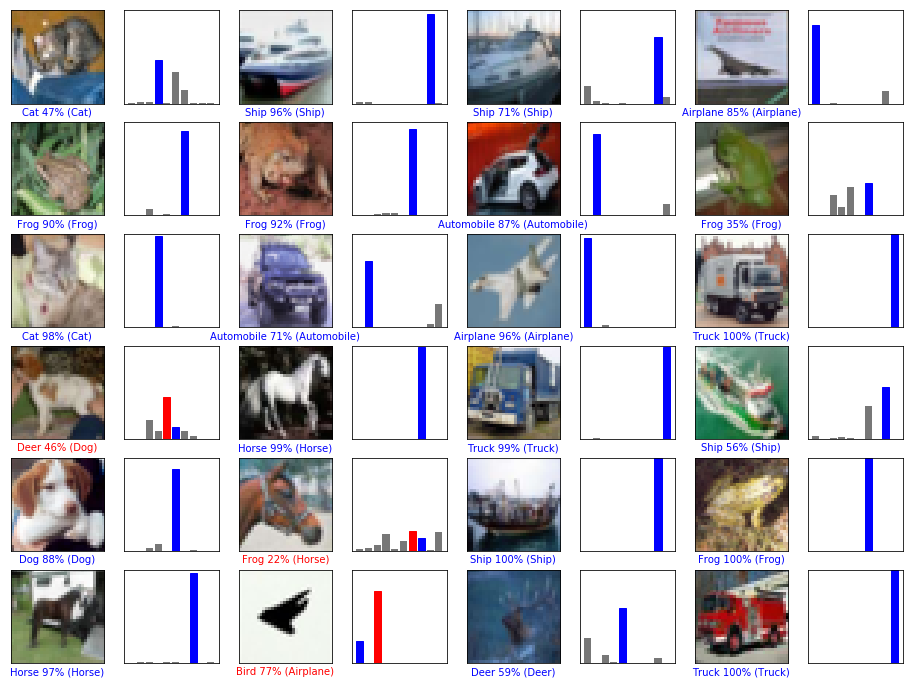

In [131]:
num_rows = 6
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, ytest, Xtest)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, ytest)